In [1]:
%run dataset_preprocessing.ipynb

import argparse
import os
import numpy as np
import math
import sys
#import torchvision.transforms as transforms
#from torchvision.utils import save_image

from torch.utils.data import DataLoader
#from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F   # NOTE: I don't think this is used
import torch.autograd as autograd
import torch

from matplotlib import pyplot as plt
from IPython import display


print(torch.cuda.is_available())

/home/zhou907/.conda/envs/cent7/5.1.0-py36/GANS2/lib/python3.6/site-packages/uproot/reading.py:186: FutureWarning: XRootD 5.1.1 is not fully supported; either upgrade to 5.2.0+ or set

    open.defaults["xrootd_handler"] = uproot.MultithreadedXRootDSource

  warnings.warn(message, FutureWarning)


False


In [2]:
class opt():   # Class used for optimizers in the future. Defines all variables and stuff needed.
    save_weights = True
    n_epochs = 40000   # an epoch is the number of times it works through the entire training set
    batch_size = 5000   # the training set is broken up into batches, 
                        # and the average loss is used from a given batch for back propagation
    lr = 0.001   # learning rate (how much to change based on error)
    b1 = 0.9   # Used for Adam. Exponential decay rate for the first moment
    b2 = 0.999   # Used for Adam. Exponential decay rate for the second moment estimates (gradient squared)
    input_size = 80
    data_file = "/data"
    config_dir = "."
    save_location = config_dir + data_file
    
    #root_path = "/depot/darkmatter/data/jupyterhub/Physics_Undergrads/Steve/things"

    #file = root_path + "/all_1.root"
    
    root_path = "/depot-new/cms/top/mcnama20/TopSpinCorr-Run2-Entanglement/CMSSW_10_2_22/src/TopAnalysis/Configuration/analysis/diLeptonic/three_files/Nominal"

    file = root_path + "/mumu_modified_root_1.root"


    #n_cpu = 2    not used rn

# os.makedirs(config_dir, exit_ok=True)

cuda = True if torch.cuda.is_available() else False


class Classifier(nn.Module):
    """
    classifier layers
    """
    def __init__(self):
        super(Classifier, self).__init__()   # Just uses the module constructor with name Discriminator 

        self.model = nn.Sequential(
            nn.Linear(opt.input_size, 512),   # first layer
            nn.LeakyReLU(0.2, inplace=True),   # apply leaky relu to layer
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 3),
            nn.LeakyReLU(0.2, inplace=True)
        )

    def forward(self, input):
        """
        applies model to input and attempts to classify
        """
        output = self.model(input)   # Classifies the input (at location) as gg (0) qqbar (1) or other (2)
        return output


# ******* OUT OF CLASSES NOW ************

# Initialize generator and discriminator
classifier = Classifier()
classifier.load_state_dict(torch.load("/depot/cms/top/zhou907/threeLayerModel_mumu_1.pt"))#load module
classifier.train()
if cuda:
    classifier.cuda()

    

# # Configure data loader - CHANGE
os.makedirs("./data/", exist_ok=True)
dataloader = torch.utils.data.DataLoader(
    ProductionModeDataset(opt.file),
    batch_size=opt.batch_size, drop_last=True,
    shuffle=True,
)
print('done')

['lb_delta_eta', 'lbbar_delta_eta', 'lnu_delta_eta', 'lnubar_delta_eta', 'lbarb_delta_eta', 'lbarbbar_delta_eta', 'lbarnu_delta_eta', 'lbarnubar_delta_eta', 'bnu_delta_eta', 'bnubar_delta_eta', 'bbarnu_delta_eta', 'bbarnubar_delta_eta', 'lb_delta_phi', 'lbbar_delta_phi', 'lnu_delta_phi', 'lnubar_delta_phi', 'lbarb_delta_phi', 'lbarbbar_delta_phi', 'lbarnu_delta_phi', 'lbarnubar_delta_phi', 'bnu_delta_phi', 'bnubar_delta_phi', 'bbarnu_delta_phi', 'bbarnubar_delta_phi', 'wplusb_delta_eta', 'wplusbbar_delta_eta', 'wminusb_delta_eta', 'wminusbbar_delta_eta', 'wplusb_delta_phi', 'wplusbbar_delta_phi', 'wminusb_delta_phi', 'wminusbbar_delta_phi', 'top_eta', 'top_boosted_eta', 'tbar_eta', 'tbar_boosted_eta', 'ttbar_delta_eta', 'ttbar_eta', 'llbar_delta_eta', 'bbbar_delta_eta', 'nunubar_delta_eta', 'top_phi', 'tbar_phi', 'ttbar_phi', 'ttbar_delta_phi', 'llbar_phi', 'llbar_delta_phi', 'bbbar_phi', 'bbbar_delta_phi', 'nunubar_phi', 'nunubar_delta_phi', 'l_eta', 'lbar_eta', 'l_phi', 'lbar_phi', '

In [3]:
# load data for evaluation of model (not training set) and separate weights and target
validation_data = ProductionModeDataset(opt.file).get_eval_data()

w_val = validation_data[:,81]
w_val = Variable(torch.from_numpy(w_val).type(torch.FloatTensor))
target_val = validation_data[:,80]
target_val = Variable(torch.from_numpy(target_val).type(torch.LongTensor))
y_val = np.transpose(validation_data)
y_val = np.delete(y_val, [80, 81, 82], 0)
y_val = np.transpose(y_val)
val_data = Variable(torch.from_numpy(y_val).type(torch.Tensor))

['lb_delta_eta', 'lbbar_delta_eta', 'lnu_delta_eta', 'lnubar_delta_eta', 'lbarb_delta_eta', 'lbarbbar_delta_eta', 'lbarnu_delta_eta', 'lbarnubar_delta_eta', 'bnu_delta_eta', 'bnubar_delta_eta', 'bbarnu_delta_eta', 'bbarnubar_delta_eta', 'lb_delta_phi', 'lbbar_delta_phi', 'lnu_delta_phi', 'lnubar_delta_phi', 'lbarb_delta_phi', 'lbarbbar_delta_phi', 'lbarnu_delta_phi', 'lbarnubar_delta_phi', 'bnu_delta_phi', 'bnubar_delta_phi', 'bbarnu_delta_phi', 'bbarnubar_delta_phi', 'wplusb_delta_eta', 'wplusbbar_delta_eta', 'wminusb_delta_eta', 'wminusbbar_delta_eta', 'wplusb_delta_phi', 'wplusbbar_delta_phi', 'wminusb_delta_phi', 'wminusbbar_delta_phi', 'top_eta', 'top_boosted_eta', 'tbar_eta', 'tbar_boosted_eta', 'ttbar_delta_eta', 'ttbar_eta', 'llbar_delta_eta', 'bbbar_delta_eta', 'nunubar_delta_eta', 'top_phi', 'tbar_phi', 'ttbar_phi', 'ttbar_delta_phi', 'llbar_phi', 'llbar_delta_phi', 'bbbar_phi', 'bbbar_delta_phi', 'nunubar_phi', 'nunubar_delta_phi', 'l_eta', 'lbar_eta', 'l_phi', 'lbar_phi', '

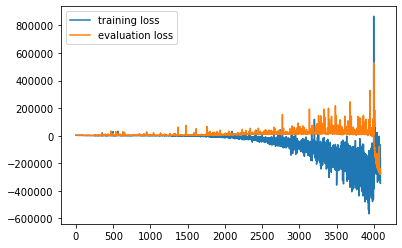

i am running
-244232.84


In [ ]:
optimizer = torch.optim.Adam(classifier.parameters(), lr=opt.lr, betas=(opt.b1, opt.b2)) 
# criterion = nn.MSELoss()   # mean squared error loss
criterion = nn.CrossEntropyLoss(reduce=False)

small_loss = 1e20   # initialize with a large loss so everything is smaller than it

#loss_val_array = np.array(())
#loss_array = np.array(())

loss_val_array = np.load("/depot/cms/top/zhou907/mumu_loss_val_array_1.npy")
lva = len(loss_val_array)
loss_array = np.load("/depot/cms/top/zhou907/mumu_loss_array_1.npy")
la = len(loss_array)

batches_done = 0   # Counter for batches
for epoch in range(opt.n_epochs):   # Loop through all epochs
    for i, x in enumerate(dataloader): # x is a batch
                                                # there are i batches in the epoch
        # Configure input
        weight = x[:,81]
        weight = Variable(weight.type(torch.FloatTensor))
        target = x[:,80]
        target = Variable(target.type(torch.LongTensor))
        #print('len of target =',len(target))
        x = np.transpose(x)
        x = np.delete(x, [80, 81, 82], 0)
        x = np.transpose(x)
#         print("mode " + str(target.shape))
#         print("x " + str(x.shape))
#         print("x" + str(x.type))
        
        # Configure input
        batch = Variable(x.type(torch.Tensor))   # Variable is a wrapper for the Tensor x was just made into

        # ---------------------
        #  Train Classifier
        # ---------------------

        optimizer.zero_grad()   # Make gradients zero so they don't accumulate
        
        # apply nn to input
        output = classifier(batch)

        # Calculate loss 
        loss_l = criterion(output, target) # -torch.mean(output) + torch.mean(y) # may need to change datatype of y
        loss = torch.dot(weight,loss_l)
        loss.backward()   # Do back propagation 
        optimizer.step()   # Update parameters based on gradients for individuals
        batches_done += 1
    
    if epoch % 10 == 0:
        
        #np.save('{file_name}/{num_batches}.npy'.format(file_name=opt.data_file, \
            #num_batches=batches_done), loss)
        
        print(loss.detach().numpy())
        loss_array = np.append(loss_array, loss.detach().numpy())
        
        
        out = classifier(val_data)   # run classifier on evaluation data to see how good it is
        loss_val = torch.dot(w_val, criterion(out, target_val))   # calculate the evaluation loss
        loss_val_array = np.append(loss_val_array, loss_val.detach().numpy())
        
        if small_loss > loss_val:   # compare to see if the loss has decreased
            small_loss = loss_val   # if the network has improved replace the best loss with this one
            torch.save(classifier.state_dict(), "/depot/cms/top/zhou907/threeLayerModel_mumu_2.pt")   # save the new (and better) network #/models
        
#         line1.set_ydata(loss_array)
#         line1.set_xdata(np.array(list(range(int(epoch/10)+1))))
        if epoch % 50 == 0:
            display.clear_output(True)
            figure = plt.figure()
            ax = figure.add_subplot(111)
            #ax.set_yscale("log")
            ax.plot(np.array(list(range(int((epoch)/10)+lva+1))), loss_array, label="training loss")
            ax.plot(np.array(list(range(int((epoch)/10)+la+1))), loss_val_array, label = "evaluation loss")
            plt.legend()

#             plt.draw()

            plt.show()
            print('i am running')
# if opt.save_weights:
#     torch.save(classifier.state_dict(), opt.config_dir + "/threeLayerModel_1.pt")




In [ ]:
np.save("/depot/cms/top/zhou907/mumu_loss_val_array_2.npy",loss_val_array)
np.save("/depot/cms/top/zhou907/mumu_loss_array_2.npy",loss_array)

In [ ]:
print(loss_val_array)